# Predicting Customer Churn - Modeling and prediction

### Data Description:

The raw data contains 7043 rows (customers data) and 21 columns (features).

**Field Descriptions**
- customerID - Customer ID
- gender - Whether the customer is a male or a female
- SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
- Partner - Whether the customer has a partner or not (Yes, No)
- Dependents - Whether the customer has dependents or not (Yes, No)
- tenure - Number of months the customer has stayed with the company
- PhoneService - Whether the customer has a phone service or not (Yes, No)
- MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod - The customer’s payment method (Electronic check, Mailed check Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
- Churn - Whether the customer churned or not (Yes or No)

This notebook does data-preprocessing, modeling and prediction

In [121]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import scipy.stats as stats
from scipy import stats
from scipy.stats import pointbiserialr, spearmanr, skew, pearsonr
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")
pd.set_option('display.max_columns', None)

#### Data import and information

In [122]:
# import the dataset
data = pd.read_csv('./Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [123]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [124]:
data.shape

(7043, 21)

In [125]:
# Numerical variables
num_var = ['tenure', 'MonthlyCharges','TotalCharges' ]

In [126]:
# Categorical variable
cat_var = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']

In [127]:
# Change senior citizen as category 
data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)

#### Splitting into train and test 

In [128]:
# Split dataset into training and test
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=0)

In [129]:
print( "train_data shape: ",train_data.shape)
print( "test_data shape: ",test_data.shape)

train_data shape:  (5634, 21)
test_data shape:  (1409, 21)


### Data Preprocessing

In [130]:
# Duplicates, null value impute

In [131]:
# Check for duplicates (train)
train_data.drop_duplicates(subset=None, keep='first', inplace=True);

In [132]:
# Check for duplicates (test)
test_data.drop_duplicates(subset=None, keep='first', inplace=True);

#### Null value

In [133]:
train_data.isnull().sum()[train_data.isnull().sum()>0]

Series([], dtype: int64)

In [134]:
test_data.isnull().sum()[test_data.isnull().sum()>0]

Series([], dtype: int64)

No missing values

##### Replacing blank values

In [135]:
train_data['TotalCharges'] = train_data['TotalCharges'].replace(" ", 0).astype('float32')

In [136]:
test_data['TotalCharges'] = test_data['TotalCharges'].replace(" ", 0).astype('float32')

### Feature Engineering

In [137]:
train_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [138]:
# drop the customer ID column
train_data.drop(['customerID'], axis = 1, inplace = True) 
test_data.drop(['customerID'], axis = 1, inplace = True) 

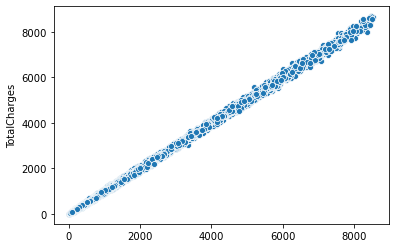

In [139]:
sns.scatterplot(train_data['MonthlyCharges']*train_data['tenure'],train_data['TotalCharges'])

TotalCharges is equivalent to tenure * monthlycharges and dhus can be dropped.

#### Correlations

In [140]:
# Numerical correlation with pearson correlation
corr_num = train_data.corr()

In [141]:
corr_num

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.250329,0.828741
MonthlyCharges,0.250329,1.000000,0.649686
TotalCharges,0.828741,0.649686,1.000000


In [142]:
# Defining spearman correlation function for all variables
def corr_spr(dataframe):
    mat = []
    for i in dataframe.columns:
        for j in dataframe.columns:
            mat.append(spearmanr(dataframe[i], dataframe[j])[0])
    return mat

In [143]:
# list of spearman correlation values
corr_spr_list = corr_spr(train_data.iloc[:,0:])
#converting spearman correlation values into dataframe
corr_spr_mat = pd.DataFrame(np.array(corr_spr_list).reshape(20,20), columns = train_data.iloc[:,0:].columns, index=train_data.iloc[:,0:].columns)

In [144]:
# Correlations with respect to churn
corr_spr_mat['Churn'].sort_values(ascending=False)

Churn               1.000000
PaperlessBilling    0.190945
MonthlyCharges      0.180819
SeniorCitizen       0.151184
PaymentMethod       0.110728
MultipleLines       0.040590
PhoneService        0.018244
gender             -0.014855
InternetService    -0.023911
StreamingTV        -0.034126
StreamingMovies    -0.049913
Partner            -0.149851
Dependents         -0.168290
DeviceProtection   -0.187980
OnlineBackup       -0.223023
TotalCharges       -0.241920
OnlineSecurity     -0.300032
TechSupport        -0.300083
tenure             -0.378248
Contract           -0.411846
Name: Churn, dtype: float64

In [145]:
#Absolute values of correlation with respect to churn
abs(corr_spr_mat['Churn']).sort_values(ascending=False)

Churn               1.000000
Contract            0.411846
tenure              0.378248
TechSupport         0.300083
OnlineSecurity      0.300032
TotalCharges        0.241920
OnlineBackup        0.223023
PaperlessBilling    0.190945
DeviceProtection    0.187980
MonthlyCharges      0.180819
Dependents          0.168290
SeniorCitizen       0.151184
Partner             0.149851
PaymentMethod       0.110728
StreamingMovies     0.049913
MultipleLines       0.040590
StreamingTV         0.034126
InternetService     0.023911
PhoneService        0.018244
gender              0.014855
Name: Churn, dtype: float64

In [146]:
# Printing feature pairs having hight correlation
thres = 0.5
for i in train_data.columns:
    for j in train_data.columns:
        sp = spearmanr(train_data[i], train_data[j])[0]
        if (abs(sp) > thres) and (abs(sp) < 0.99): 
            print(i,j, sp)
    

tenure Contract 0.6680403856539722
tenure TotalCharges 0.8913135386619329
Contract tenure 0.6680403856539722
MonthlyCharges TotalCharges 0.6356549869100625
TotalCharges tenure 0.8913135386619329
TotalCharges MonthlyCharges 0.6356549869100624


####  Encoding categorical variable

In [147]:
train_data[cat_var].nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [148]:
# Categorical variables with binary values
bin_var = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService','PaperlessBilling','Churn']

In [149]:
# Categorical variables with multiple values
mul_var = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

We perform label/ordinal encoding for binary variables and one-hot encoding for multiple variables

#### Label/ ordinal encoding binary columns

In [150]:
train_data_enc = train_data

In [151]:
# Label encoding the binary columns of train data
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
train_data_enc[bin_var] = ord_enc.fit_transform(train_data[bin_var])

In [152]:
# For test data
test_data_enc = test_data
test_data_enc[bin_var] = ord_enc.fit_transform(test_data[bin_var])

#### One hot encoding multi-category columns

In [153]:
train_data_ohe = train_data_enc

In [154]:
train_data_ohe = pd.get_dummies(data=train_data_enc, columns=mul_var, drop_first=True) 
# drop_first required to get k-1 columns and avoid dummy variable trap

In [155]:
# For test data
test_data_ohe = test_data_enc
test_data_ohe = pd.get_dummies(data=test_data_enc, columns=mul_var, drop_first=True) 
# drop_first required to get k-1 columns and avoid dummy variable trap

#### Feature scaling

In [156]:
# Separating into feature and target data
X = train_data_ohe.loc[:, train_data_ohe.columns != 'Churn']
y = train_data_ohe['Churn']

In [157]:
# Separating into feature and target data for test data
Xt = test_data_ohe.loc[:, test_data_ohe.columns != 'Churn']
yt = test_data_ohe['Churn']

 **Feature scaling using Min-Max Scalar**

In [158]:
# Feature scaling for training data
from sklearn.preprocessing import MinMaxScaler
mm_sc = MinMaxScaler()
sf = mm_sc.fit_transform(X.values) # feature scaled (return numpy array)
X_sc = pd.DataFrame(sf, index=X.index, columns=X.columns) # convert back to dataframe

In [159]:
# Feature scaling for test data
sf = mm_sc.fit_transform(Xt.values) # feature scaled (return numpy array)
Xt_sc = pd.DataFrame(sf, index=Xt.index, columns=Xt.columns) # convert back to dataframe

## Machine Learning modeling

Models -> Random Forest, Logistic regression, KNN, SVM, XGB

## Random Forest

In [160]:
%%time
# Random forest grid search for best parameters
from sklearn.ensemble import RandomForestClassifier
RF_cls = RandomForestClassifier(random_state = 0)
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [50, 100, 200, 300, 400], 'max_features': ['auto', None, 'log2']}]
RF_GCV = GridSearchCV(estimator = RF_cls, 
                           param_grid = parameters,
                           scoring = 'f1', # Imbalanced dataset so used f1 instead of accuracy
                           cv = 5,
                           n_jobs = -1,
                           return_train_score=True)
RF_GCV = RF_GCV.fit(X_sc, y)
best_score = RF_GCV.best_score_
best_parameters = RF_GCV.best_params_
print("Best score: {:.2f}".format(best_score))
print("Best Parameters:", best_parameters)

Best score: 0.57
Best Parameters: {'max_features': 'log2', 'n_estimators': 300}
CPU times: user 1.6 s, sys: 220 ms, total: 1.82 s
Wall time: 18.2 s


#### Fine-tuning Random Forest

In [161]:
parameters = [{'n_estimators': list(range(210,400,10)), 'max_features': ['log2']}]
RF_GCV = GridSearchCV(estimator = RF_cls, 
                           param_grid = parameters,
                           scoring = 'f1', # Imbalanced dataset so used f1 instead of accuracy
                           cv = 5,
                           #n_jobs = -1,
                           return_train_score=True)
RF_GCV = RF_GCV.fit(X_sc, y)
best_score = RF_GCV.best_score_
best_parameters = RF_GCV.best_params_
print("Best score: {:.2f}".format(best_score))
print("Best Parameters:", best_parameters)

Best score: 0.57
Best Parameters: {'max_features': 'log2', 'n_estimators': 310}


In [162]:
y_pred_RF = RF_GCV.predict(X_sc) 

#### Saving the ML model

In [163]:
import pickle

# to save
with open('./Models/RF.pkl','wb') as f:
    pickle.dump(RF_GCV, f)

# to load
#with open('model.pkl', 'rb') as f:
    #loaded_model_rf = pickle.load(f)

### Prediction evaluation

#### Confusion matrix

In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred_RF)

array([[4125,    8],
       [   6, 1495]])

True positive = 4126 <br> True Negative = 1494<br> False postive = 7<br> False Negative = 7

#### Precision and Recall

In [165]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: \n' ,confusion_matrix(y, y_pred_RF))
print('Precision Score: ', precision_score(y, y_pred_RF))
print('Recall Score: ', recall_score(y, y_pred_RF))

Confusion Matrix: 
 [[4125    8]
 [   6 1495]]
Precision Score:  0.9946773120425815
Recall Score:  0.9960026648900733


In [166]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_RF))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4133
         1.0       0.99      1.00      1.00      1501

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



#### Cross-validation

In [167]:
from sklearn.model_selection import cross_validate
scores_RF = cross_validate(RF_GCV, X_sc, y, cv=5,
                 scoring=('accuracy','precision','recall','roc_auc','f1' ),
                 return_train_score=False)

In [168]:
scores_RF

{'fit_time': array([99.04003048, 99.24788547, 98.69368696, 98.50157166, 98.64326954]),
 'score_time': array([0.13459611, 0.17670321, 0.16751385, 0.19070172, 0.18006086]),
 'test_accuracy': array([0.81632653, 0.81011535, 0.79325643, 0.78438332, 0.79218472]),
 'test_precision': array([0.69620253, 0.69545455, 0.63900415, 0.63063063, 0.63414634]),
 'test_recall': array([0.55      , 0.51      , 0.51333333, 0.46511628, 0.52      ]),
 'test_roc_auc': array([0.84710399, 0.83954655, 0.81970375, 0.81929082, 0.8381134 ]),
 'test_f1': array([0.61452514, 0.58846154, 0.56931608, 0.53537285, 0.57142857])}

In [169]:
# Function to print CV evaluation scores
def print_CV_eval(scores):
    print( 'test_accuracy mean = ', scores['test_accuracy'].mean(), ', test_accuracy std = ', scores['test_accuracy'].std(), 
    '\n test_precision mean = ', scores['test_precision'].mean(),', test_precision std = ', scores['test_precision'].std(),
    '\n test_recall mean = ', scores['test_recall'].mean(), ', test_recall std = ', scores['test_recall'].std(),
    '\n test_f1 mean = ', scores['test_f1'].mean(), ', test_f1 std = ', scores['test_f1'].std(),
    '\n test_roc_auc mean = ', scores['test_roc_auc'].mean(), ', test_roc_auc std = ', scores['test_roc_auc'].std())

In [170]:
print_CV_eval(scores_RF)

test_accuracy mean =  0.7992532714684454 , test_accuracy std =  0.011970988793426549 
 test_precision mean =  0.6590876397143508 , test_precision std =  0.030117381508763245 
 test_recall mean =  0.5116899224806202 , test_recall std =  0.027244743807573545 
 test_f1 mean =  0.5758208359668316 , test_f1 std =  0.02590542012320202 
 test_roc_auc mean =  0.8327517025770328 , test_roc_auc std =  0.01124589121218418


#### Feature Importance

In [171]:
RF_cls = RandomForestClassifier(n_estimators =  300, max_features =  'log2', random_state = 0)
RF_cls.fit(X_sc,y)

RandomForestClassifier(max_features='log2', n_estimators=300, random_state=0)

In [172]:
RF_cls.feature_importances_ # returns numpy array
Feat_Imp = pd.DataFrame({'Features': X_sc.columns, 'Importance Score': RF_cls.feature_importances_}) # convert into dataframe


In [173]:
FI_sorted = Feat_Imp.sort_values(by=['Importance Score'], ascending=False)
FI_sorted.head(15)

,Features,Importance Score
8,TotalCharges,0.192657
4,tenure,0.176406
7,MonthlyCharges,0.165569
28,PaymentMethod_Electronic check,0.037882
11,InternetService_Fiber optic,0.036692
26,Contract_Two year,0.028362
0,gender,0.027718
6,PaperlessBilling,0.025222
14,OnlineSecurity_Yes,0.024966
20,TechSupport_Yes,0.024160


Tenure, monthly charges and hence total charges seem to have most influence. 

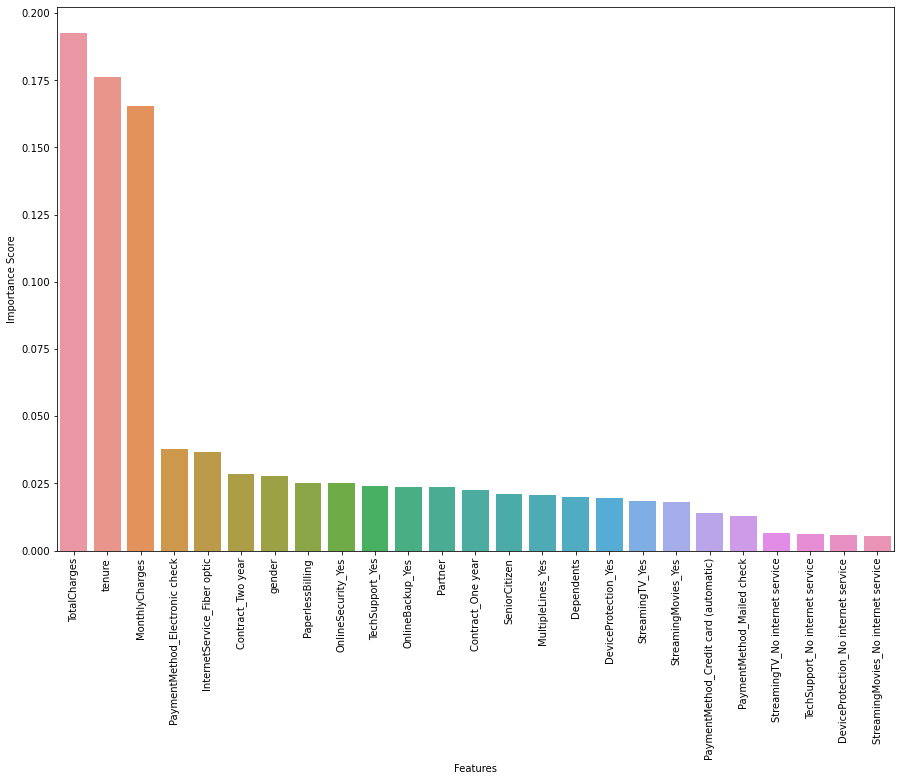

In [174]:
plt.subplots(figsize=(15, 10))
ax = sns.barplot(x='Features', y='Importance Score', data = FI_sorted.head(25))
ax.xaxis.set_tick_params(rotation=90)

In [175]:
#RF_cls.fit(Xt_sc,yt)

In [176]:
#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
#import matplotlib.pyplot as plt

#disp = plot_precision_recall_curve(RF_GCV, X_sc, y)

## K-Nearest Neighbors

In [177]:
from sklearn.neighbors import KNeighborsClassifier
KNN_cls = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [3,5,7,10,15,20,25,30,50,100,200]}]
KNN_GCV = GridSearchCV(estimator = KNN_cls, 
                           param_grid = parameters,
                           scoring = 'f1', # Imbalanced dataset so used f1 instead of accuracy
                           cv = 5,
                           n_jobs = -1,
                           return_train_score=True)
KNN_GCV = KNN_GCV.fit(X_sc, y)
best_score = KNN_GCV.best_score_
best_parameters = KNN_GCV.best_params_
print("Best f1 score: {:.2f}".format(best_score))
print("Best Parameters:", best_parameters)                           

Best f1 score: 0.59
Best Parameters: {'n_neighbors': 25}


#### Fine-tuning K-Nearest Neighbor

In [178]:
parameters = [{'n_neighbors': list(range(21,30))}]
KNN_GCV = GridSearchCV(estimator = KNN_cls, 
                           param_grid = parameters,
                           scoring = 'f1', # Imbalanced dataset so used f1 instead of accuracy
                           cv = 5,
                           #n_jobs = -1,
                           return_train_score=True)
KNN_GCV = KNN_GCV.fit(X_sc, y)
best_score = KNN_GCV.best_score_
best_parameters = KNN_GCV.best_params_
print("Best f1 score: {:.2f}".format(best_score))
print("Best Parameters:", best_parameters) 

Best f1 score: 0.60
Best Parameters: {'n_neighbors': 27}


K-Nearest Neighbors gives better F1 score than RF

In [179]:
y_pred_KNN = KNN_GCV.predict(X_sc) 

#### Saving the ML Model

In [180]:
import pickle

# to save
with open('./Models/KNN.pkl','wb') as f:
    pickle.dump(KNN_GCV, f)

### Evaluation

#### Confusion Matrix, Precision & Recall (training set)

In [181]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred_KNN)

array([[3643,  490],
       [ 606,  895]])

In [182]:
from sklearn.metrics import precision_score, recall_score
print('Precision Score: ', precision_score(y, y_pred_KNN))
from sklearn.metrics import precision_score, recall_score
print('Recall Score: ', recall_score(y, y_pred_KNN))

Precision Score:  0.6462093862815884
Recall Score:  0.5962691538974018


In [183]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_KNN))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      4133
         1.0       0.65      0.60      0.62      1501

    accuracy                           0.81      5634
   macro avg       0.75      0.74      0.74      5634
weighted avg       0.80      0.81      0.80      5634



#### Cross-validation

In [184]:
from sklearn.model_selection import cross_validate
scores_KNN = cross_validate(KNN_GCV, X_sc, y, cv=5,
                 scoring=('accuracy','precision','recall','roc_auc','f1' ),
                 return_train_score=False)

In [185]:
scores_KNN

{'fit_time': array([32.84401989, 32.91539025, 32.43513942, 33.05011368, 32.664078  ]),
 'score_time': array([0.44729376, 0.4630127 , 0.44888735, 0.45236444, 0.44214129]),
 'test_accuracy': array([0.79236912, 0.79680568, 0.77728483, 0.76663709, 0.80728242]),
 'test_precision': array([0.61702128, 0.6437247 , 0.57827476, 0.56506849, 0.6445993 ]),
 'test_recall': array([0.58      , 0.53      , 0.60333333, 0.54817276, 0.61666667]),
 'test_roc_auc': array([0.84089077, 0.8321181 , 0.81528214, 0.81518023, 0.84428571]),
 'test_f1': array([0.59793814, 0.58135283, 0.59053834, 0.55649241, 0.63032368])}

In [186]:
print_CV_eval(scores_KNN)

test_accuracy mean =  0.7880758265156398 , test_accuracy std =  0.01441943743298485 
 test_precision mean =  0.6097377059243959 , test_precision std =  0.03288997534938913 
 test_recall mean =  0.5756345514950166 , test_recall std =  0.03257783464989797 
 test_f1 mean =  0.5913290810429338 , test_f1 std =  0.023991676811572805 
 test_roc_auc mean =  0.8295513913043273 , test_roc_auc std =  0.012348371812712427


## Support Vector Machine

### Linear SVM

In SVM standard scaling is recommended. Standardization -> subtract mean value then divide by standard deviation

In [187]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
sf = std_sc.fit_transform(X_sc.values) # feature scaled (return numpy array)
X_ssc = pd.DataFrame(sf, index=X_sc.index, columns=X_sc.columns) # convert back to dataframe

In [188]:
from sklearn.svm import LinearSVC
LSVM_cls = LinearSVC(random_state=0)
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.1, 1, 10, 100, 1000]}]
LSVM_GCV = GridSearchCV(estimator = LSVM_cls, 
                           param_grid = parameters,
                           scoring = 'f1', # Imbalanced dataset so used f1 instead of accuracy
                           cv = 5,
                           #n_jobs = -1,
                           return_train_score=False)
LSVM_GCV = LSVM_GCV.fit(X_ssc, y)
best_score = LSVM_GCV.best_score_
best_parameters = LSVM_GCV.best_params_
print("Best f1 score: {:.2f}".format(best_score))
print("Best Parameters:", best_parameters)

Best f1 score: 0.60
Best Parameters: {'C': 1}


#### Fine Tuning Linear Support Vector Machine

In [189]:
parameters = [{'C': list(range(10))}]
LSVM_GCV = GridSearchCV(estimator = LSVM_cls, 
                           param_grid = parameters,
                           scoring = 'f1', # Imbalanced dataset so used f1 instead of accuracy
                           cv = 5,
                           #n_jobs = -1,
                           return_train_score=False)
LSVM_GCV = LSVM_GCV.fit(X_ssc, y)
best_score = LSVM_GCV.best_score_
best_parameters = LSVM_GCV.best_params_
print("Best f1 score: {:.2f}".format(best_score))
print("Best Parameters:", best_parameters)

Best f1 score: 0.60
Best Parameters: {'C': 6}


In [190]:
y_pred_LSVM = LSVM_GCV.predict(X_ssc) 

#### Saving the ML Model

In [191]:
import pickle

# to save
with open('./Models/LSVM.pkl','wb') as f:
    pickle.dump(LSVM_GCV, f)

### Evaluation

#### Confusion Matrix, Precision & Recall (training set)

In [192]:
print('Confusion Matrix: \n' ,confusion_matrix(y, y_pred_LSVM))
print('Precision Score: ', precision_score(y, y_pred_LSVM))
print('Recall Score: ', recall_score(y, y_pred_LSVM))

Confusion Matrix: 
 [[3756  377]
 [ 708  793]]
Precision Score:  0.6777777777777778
Recall Score:  0.5283144570286475


In [193]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_LSVM))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      4133
         1.0       0.68      0.53      0.59      1501

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.73      5634
weighted avg       0.80      0.81      0.80      5634



#### Cross-Validation

In [194]:
from sklearn.model_selection import cross_validate
scores_LSVM = cross_validate(LSVM_GCV, X_ssc, y, cv=5,
                 scoring=('accuracy','precision','recall','roc_auc','f1' ),
                 return_train_score=False)

In [195]:
scores_LSVM

{'fit_time': array([14.10309052, 14.17797518, 13.98655224, 14.3729496 , 13.82815266]),
 'score_time': array([0.008147  , 0.00788188, 0.00799346, 0.00814486, 0.00809908]),
 'test_accuracy': array([0.81188997, 0.80035492, 0.79769299, 0.78615794, 0.81616341]),
 'test_precision': array([0.671875  , 0.67123288, 0.63432836, 0.60791367, 0.68379447]),
 'test_recall': array([0.57333333, 0.49      , 0.56666667, 0.56146179, 0.57666667]),
 'test_roc_auc': array([0.84866183, 0.85508867, 0.8353426 , 0.83157634, 0.85904762]),
 'test_f1': array([0.61870504, 0.56647399, 0.59859155, 0.58376511, 0.62567812])}

In [196]:
print_CV_eval(scores_LSVM)

test_accuracy mean =  0.8024518479876314 , test_accuracy std =  0.010673521982458564 
 test_precision mean =  0.653828874077839 , test_precision std =  0.028337165921997302 
 test_recall mean =  0.55362569213732 , test_recall std =  0.03224586124796668 
 test_f1 mean =  0.5986427610635663 , test_f1 std =  0.02186130124551687 
 test_roc_auc mean =  0.845943414049971 , test_roc_auc std =  0.01078457828081377


### Kernel SVM

In [197]:
%time
from sklearn.svm import SVC
SVM_cls = SVC(random_state=0)
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
               {'kernel': ['poly'], 'degree': [2, 3], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}     ]
SVM_GCV = GridSearchCV(estimator = SVM_cls, 
                           param_grid = parameters,
                           scoring = 'f1', # Imbalanced dataset so used f1 instead of accuracy
                           cv = 5,
                           #n_jobs = -1,
                           return_train_score=False)
SVM_GCV = SVM_GCV.fit(X_ssc, y)
best_score = SVM_GCV.best_score_
best_parameters = SVM_GCV.best_params_
print("Best f1 score: {:.2f}".format(best_score))
print("Best Parameters:", best_parameters)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.9 µs
Best f1 score: 0.59
Best Parameters: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


#### Fine Tuning Kernel SVM

In [198]:
SVM_cls = SVC(kernel =  'rbf', random_state=0)
parameters = [{'gamma': [5e-4, 1e-4],
              'C': [200, 400, 600, 800, 1000]}]
SVM_GCV = GridSearchCV(estimator = SVM_cls, 
                           param_grid = parameters,
                           scoring = 'f1', # Imbalanced dataset so used f1 instead of accuracy
                           cv = 5,
                           #n_jobs = -1,
                           return_train_score=False)
SVM_GCV = SVM_GCV.fit(X_ssc, y)
best_score = SVM_GCV.best_score_
best_parameters = SVM_GCV.best_params_
print("Best f1 score: {:.2f}".format(best_score))
print("Best Parameters:", best_parameters)             

Best f1 score: 0.59
Best Parameters: {'C': 200, 'gamma': 0.0001}


In [199]:
y_pred_SVM = SVM_GCV.predict(X_ssc) 

#### Save ML model

In [200]:
import pickle

# to save
with open('./Models/SVM.pkl','wb') as f:
    pickle.dump(SVM_GCV, f)

### Evaluation

In [201]:
print('Confusion Matrix: \n' ,confusion_matrix(y, y_pred_SVM))
print('Precision Score: ', precision_score(y, y_pred_SVM))
print('Recall Score: ', recall_score(y, y_pred_SVM))

Confusion Matrix: 
 [[3712  421]
 [ 687  814]]
Precision Score:  0.6591093117408907
Recall Score:  0.5423051299133911


In [202]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_SVM))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      4133
         1.0       0.66      0.54      0.60      1501

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.80      5634



#### Cross Validation

In [203]:
from sklearn.model_selection import cross_validate
scores_SVM = cross_validate(SVM_GCV, X_ssc, y, cv=5,
                 scoring=('accuracy','precision','recall','roc_auc','f1' ),
                 return_train_score=False)

In [204]:
scores_SVM

{'fit_time': array([28.09056854, 28.23233962, 27.51779962, 27.54674673, 27.86423206]),
 'score_time': array([0.21317124, 0.21424341, 0.21000886, 0.21203971, 0.21412015]),
 'test_accuracy': array([0.80212955, 0.79503106, 0.79591837, 0.78438332, 0.81616341]),
 'test_precision': array([0.65217391, 0.66046512, 0.62962963, 0.61507937, 0.68825911]),
 'test_recall': array([0.55      , 0.47333333, 0.56666667, 0.51495017, 0.56666667]),
 'test_roc_auc': array([0.84154373, 0.84461306, 0.83278315, 0.82484334, 0.85632768]),
 'test_f1': array([0.59674503, 0.55145631, 0.59649123, 0.56057866, 0.62157221])}

In [205]:
print_CV_eval(scores_SVM)

test_accuracy mean =  0.798725139913097 , test_accuracy std =  0.010420127965294259 
 test_precision mean =  0.6491214266686567 , test_precision std =  0.025331984836472563 
 test_recall mean =  0.5343233665559246 , test_recall std =  0.03586931838812427 
 test_f1 mean =  0.5853686879569718 , test_f1 std =  0.025800859972450543 
 test_roc_auc mean =  0.8400221932356111 , test_roc_auc std =  0.010696368388101472


## XGBoost

In [206]:
import xgboost as xgb
XGB_cls = xgb.XGBClassifier(objective = 'binary:logistic', random_state=0)
parameters = {'learning_rate': [0.03, 0.05, 0.07, 0.1], 
              'max_depth': [3, 6, 9],
              'n_estimators': [100,200,500,1000]} 
XGB_GCV = GridSearchCV(estimator = XGB_cls, 
                           param_grid = parameters,
                           scoring = 'f1', # Imbalanced dataset so used f1 instead of accuracy
                           cv = 5,
                           n_jobs = -1,
                           return_train_score=False)
XGB_GCV = XGB_GCV.fit(X_sc, y)
best_score = XGB_GCV.best_score_
best_parameters = XGB_GCV.best_params_
print("Best f1 score: {:.2f}".format(best_score))
print("Best Parameters:", best_parameters)              

Best f1 score: 0.60
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


#### Fine-Tuning XG Boost

In [207]:
parameters = {'learning_rate': [0.04, 0.05, 0.06], 
              'max_depth': [2,3,4,5],
              'n_estimators': [200,300,400]} 
XGB_GCV = GridSearchCV(estimator = XGB_cls, 
                           param_grid = parameters,
                           scoring = 'f1', # Imbalanced dataset so used f1 instead of accuracy
                           cv = 5,
                           n_jobs = -1,
                           return_train_score=False)
XGB_GCV = XGB_GCV.fit(X_sc, y)
best_score = XGB_GCV.best_score_
best_parameters = XGB_GCV.best_params_
print("Best f1 score: {:.2f}".format(best_score))
print("Best Parameters:", best_parameters)

Best f1 score: 0.60
Best Parameters: {'learning_rate': 0.06, 'max_depth': 3, 'n_estimators': 200}


In [219]:
y_pred_XGB = XGB_GCV.predict(X_sc) 

#### Save Model

In [209]:
import pickle

# to save
with open('./Models/XGB.pkl','wb') as f:
    pickle.dump(XGB_GCV, f)

#### Evaluation (Train)

In [210]:
print('Confusion Matrix: \n' ,confusion_matrix(y, y_pred_XGB))
print('Precision Score: ', precision_score(y, y_pred_XGB))
print('Recall Score: ', recall_score(y, y_pred_XGB))

Confusion Matrix: 
 [[3791  342]
 [ 625  876]]
Precision Score:  0.7192118226600985
Recall Score:  0.5836109260493004


In [211]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_XGB))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      4133
         1.0       0.72      0.58      0.64      1501

    accuracy                           0.83      5634
   macro avg       0.79      0.75      0.77      5634
weighted avg       0.82      0.83      0.82      5634



#### Cross-validation

In [212]:
from sklearn.model_selection import cross_validate
scores_XGB = cross_validate(XGB_GCV, X_sc, y, cv=5,
                 scoring=('accuracy','precision','recall','roc_auc','f1' ),
                 return_train_score=False)

In [213]:
print(scores_XGB)

{'fit_time': array([22.54663587, 22.17040181, 21.83727312, 21.8132813 , 21.83058405]), 'score_time': array([0.02418613, 0.02058053, 0.01628852, 0.01625943, 0.01681519]), 'test_accuracy': array([0.80834073, 0.80834073, 0.8136646 , 0.78793256, 0.80905861]), 'test_precision': array([0.65555556, 0.68421053, 0.68907563, 0.62916667, 0.67489712]), 'test_recall': array([0.59      , 0.52      , 0.54666667, 0.50166113, 0.54666667]), 'test_roc_auc': array([0.85112858, 0.85543329, 0.84482064, 0.83964871, 0.8542272 ]), 'test_f1': array([0.62105263, 0.59090909, 0.60966543, 0.55822551, 0.60405157])}


In [214]:
print_CV_eval(scores_XGB)

test_accuracy mean =  0.805467446071795 , test_accuracy std =  0.008989697811326377 
 test_precision mean =  0.6665810996263353 , test_precision std =  0.02194246655746185 
 test_recall mean =  0.5409988925802878 , test_recall std =  0.029845498631946656 
 test_f1 mean =  0.5967808447385587 , test_f1 std =  0.02158233976079948 
 test_roc_auc mean =  0.8490516831428547 , test_roc_auc std =  0.005968954203622255


In [215]:
scores = [scores_RF,scores_KNN,scores_LSVM,scores_SVM,scores_XGB]
cv_accuracy = []
cv_precision = []
cv_recall = []
cv_f1 = []
cv_roc = []
for i in scores:
    cv_accuracy.append(i['test_accuracy'].mean())
    cv_precision.append(i['test_precision'].mean())
    cv_recall.append(i['test_recall'].mean())
    cv_f1.append(i['test_f1'].mean())
    cv_roc.append(i['test_roc_auc'].mean())

In [216]:

print('accuracy', cv_accuracy)
print('precision', cv_precision)
print('recall', cv_recall)
print('f1', cv_f1)
print('roc', cv_roc)

accuracy [0.7992532714684454, 0.7880758265156398, 0.8024518479876314, 0.798725139913097, 0.805467446071795]
precision [0.6590876397143508, 0.6097377059243959, 0.653828874077839, 0.6491214266686567, 0.6665810996263353]
recall [0.5116899224806202, 0.5756345514950166, 0.55362569213732, 0.5343233665559246, 0.5409988925802878]
f1 [0.5758208359668316, 0.5913290810429338, 0.5986427610635663, 0.5853686879569718, 0.5967808447385587]
roc [0.8327517025770328, 0.8295513913043273, 0.845943414049971, 0.8400221932356111, 0.8490516831428547]


XG Boost has the highest accuracy, precision, f1, roc <br>
KNN has highest recall <br>
Overall XG Boost is the best model

## Evaluation of test dataset

In [220]:
XGB_GCV.fit(Xt_sc,yt)

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [200, 300, 400]},
             scoring='f1')

In [221]:
y_pred_XGB_test = XGB_GCV.predict(Xt_sc)

In [226]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print('Confusion Matrix: \n' ,confusion_matrix(yt, y_pred_XGB_test))
print('Accuracy Score: ', accuracy_score(yt, y_pred_XGB_test))
print('Precision Score: ', precision_score(yt, y_pred_XGB_test))
print('Recall Score: ', recall_score(yt, y_pred_XGB_test))
print('F1 Score: ', f1_score(yt, y_pred_XGB_test))

Confusion Matrix: 
 [[970  71]
 [138 230]]
Accuracy Score:  0.8516678495386799
Precision Score:  0.7641196013289037
Recall Score:  0.625
F1 Score:  0.687593423019432


In [223]:
from sklearn.metrics import classification_report
print(classification_report(yt, y_pred_XGB_test))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      1041
         1.0       0.76      0.62      0.69       368

    accuracy                           0.85      1409
   macro avg       0.82      0.78      0.80      1409
weighted avg       0.85      0.85      0.85      1409



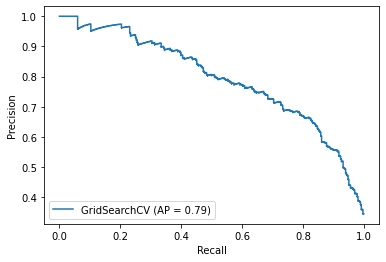

In [228]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(XGB_GCV, Xt_sc, yt)